<a href="https://colab.research.google.com/github/sensasi-delight/klasterisasi-link-prediction-kmeans/blob/main/Klasterisasi%20Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Inisialisasi

0.1. Impor Pustaka Python

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing


0.2 Import Dataset Fitur

In [2]:
!wget -qnc -P '' https://archive.org/download/caleg-linkprediction-dataset/d3%20-%20Dataset%20Hasil%20Ekstraksi%20Fitur.csv


In [3]:
df_fitur = pd.read_csv("d3 - Dataset Hasil Ekstraksi Fitur.csv")
df_fitur

,node1,node2,cn,pa,tn,sp,sl
0,Ir A L LONGDONG,Ir A. ANDRIANSYAH,0.0,4.0,4.0,0.0,0.0
1,Ir A L LONGDONG,Ir A. BAGUS PEKIK. H,0.0,4.0,4.0,0.0,0.0
2,Ir A L LONGDONG,A. DADAN SURYANA S.Sos,0.0,4.0,4.0,0.0,0.0
3,Ir A L LONGDONG,"A. DARSONO SH, MH",1.0,4.0,3.0,0.0,0.0
4,Ir A L LONGDONG,A. GUNAWAN SE,0.0,4.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...
12472510,ZULKARNAIN S.Pd.I,ZULKIFLI NIODE,0.0,4.0,4.0,0.0,0.0
12472511,ZULKARNAIN S.Pd.I,ZUMALA EVA CHANDRASARI,0.0,4.0,4.0,0.0,0.0
12472512,"ZULKIFLI S.Si, M.Si",ZULKIFLI NIODE,0.0,4.0,4.0,0.0,0.0
12472513,"ZULKIFLI S.Si, M.Si",ZUMALA EVA CHANDRASARI,0.0,4.0,4.0,0.0,0.0


# 1. Praproses Dataset

1.1. Pembersihan Dataset

In [4]:
df_features = df_fitur.drop(['node1', 'node2'],axis=1)
arr_features = df_features.to_numpy()

pd.DataFrame(arr_features).describe()

,0,1,2,3,4
count,1.247252e+07,12472515.0,1.247252e+07,12472515.0,12472515.0
mean,9.984394e-02,4.0,3.900156e+00,0.0,0.0
std,3.033298e-01,0.0,3.033298e-01,0.0,0.0
min,0.000000e+00,4.0,2.000000e+00,0.0,0.0
25%,0.000000e+00,4.0,4.000000e+00,0.0,0.0
50%,0.000000e+00,4.0,4.000000e+00,0.0,0.0
75%,0.000000e+00,4.0,4.000000e+00,0.0,0.0
max,2.000000e+00,4.0,4.000000e+00,0.0,0.0


Visualisasi Dataset Bersih

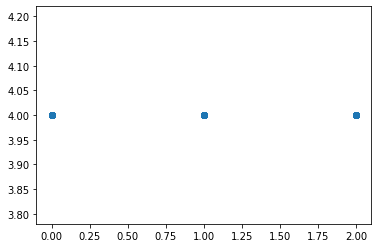

In [5]:
plt.scatter(arr_features[:,0], arr_features[:,1])

# 2. Klasiterisasi

2.1. Analisis Metode Elbow

In [6]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(arr_features)
    kmeanModel.fit(arr_features)
    inertia.append(kmeanModel.inertia_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6

Visualisasi Hasil Analisis Elbow

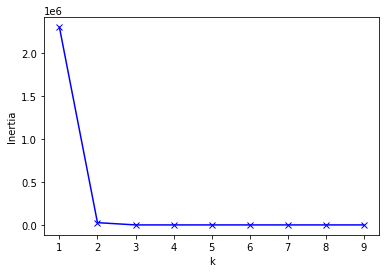

In [7]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

2.1 Klasterisasi K-Means

In [8]:
kmeans = KMeans(n_clusters=3).fit(arr_features)

In [9]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledFeatures = pd.concat((df_features,labels),axis=1)
labeledFeatures = labeledFeatures.rename({0:'labels'},axis=1)
labeledFeatures

,cn,pa,tn,sp,sl,labels
0,0.0,4.0,4.0,0.0,0.0,0
1,0.0,4.0,4.0,0.0,0.0,0
2,0.0,4.0,4.0,0.0,0.0,0
3,1.0,4.0,3.0,0.0,0.0,1
4,0.0,4.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...
12472510,0.0,4.0,4.0,0.0,0.0,0
12472511,0.0,4.0,4.0,0.0,0.0,0
12472512,0.0,4.0,4.0,0.0,0.0,0
12472513,0.0,4.0,4.0,0.0,0.0,0


Visualisasi Hasil Klasterisasi

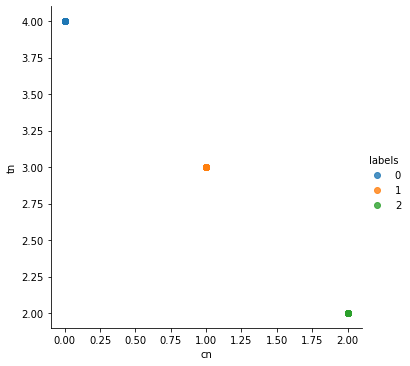

In [10]:
sns.lmplot(
    x='cn',
    y='tn',
    data=labeledFeatures,
    hue='labels',
    fit_reg=False
)